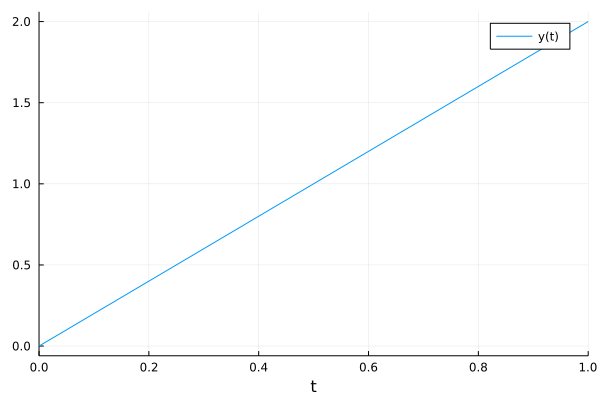

In [16]:
# Example 1
# dy/dt = 1
# y = t+C

using OrdinaryDiffEq
f(y,x,t) = 2
y0 = 0
tspan = (0.0,1.0);
ODE = ODEProblem(f,y0,tspan);
sol = solve(ODE, Tsit5(), reltol=1e-8, abstol=1e-8);

using Plots
plot(sol, xaxis = "t", label = "y(t)")

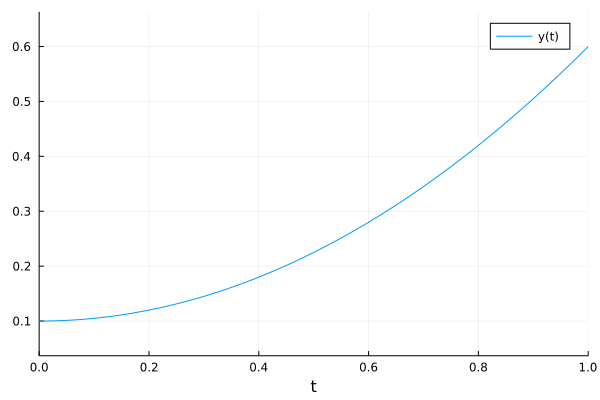

In [17]:
# Example 2
# dy/dt = t
# y = t^2/2 + C

using OrdinaryDiffEq
f(y,x,t) = t
y0 = 0.1
tspan = (0.0,1.0);
ODE = ODEProblem(f,y0,tspan);
sol = solve(ODE, Tsit5(), reltol=1e-8, abstol=1e-8);

using Plots
plot(sol, xaxis = "t", label = "y(t)", aspect_ratio=:equal)

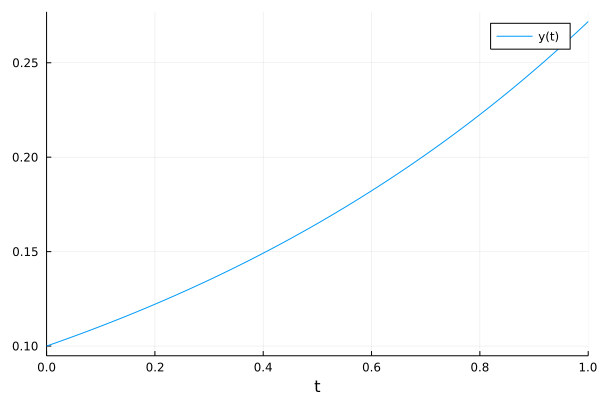

In [18]:
# Example 3
# dy/dt = y
# y = Ae^1t + B

using OrdinaryDiffEq
f(y,x,t) = y
y0 = 0.1
tspan = (0.0,1.0);
ODE = ODEProblem(f,y0,tspan);
sol = solve(ODE, Tsit5(), reltol=1e-8, abstol=1e-8);

using Plots
plot(sol, xaxis = "t", label = "y(t)")

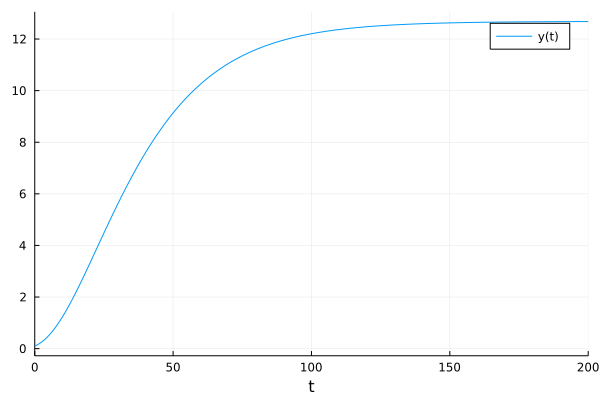

In [19]:
# Example 4: Solow Model
# dk/dt = s*f(k(t))-(n+g+d)k(t)

using OrdinaryDiffEq
f(y,x,t) = 0.3*y^0.7 - (0.02+0.02+0.1)y
y0 = 0.1
tspan = (0.0,200.0);
ODE = ODEProblem(f,y0,tspan);
sol = solve(ODE, Tsit5(), reltol=1e-8, abstol=1e-8);

using Plots
plot(sol, xaxis = "t", label = "y(t)")

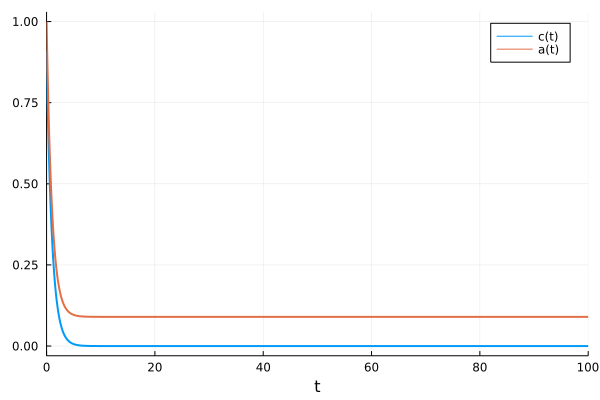

In [54]:
# Example 4: Cake Eating
# max ∫ln(c(t))dt
# s.t. a'(t) = -c(t), a(0) given, lim x(t) >= 0 
# Solution: c'(t) = ρc(t), x'(t) = -c(t)

ρ = 1
a0 = 1
c0 = 0.91

function problem!(du,u,p,t)
    du[1] = -ρ*u[1]       
    du[2] = -u[1]
end

tspan = (0.0,100.0);
prob = ODEProblem(problem!,[c0,a0],tspan)
sol = solve(prob, Tsit5())

plot(sol,linewidth=2,xaxis="t",label=["c(t)" "a(t)"],layout=(1,1))

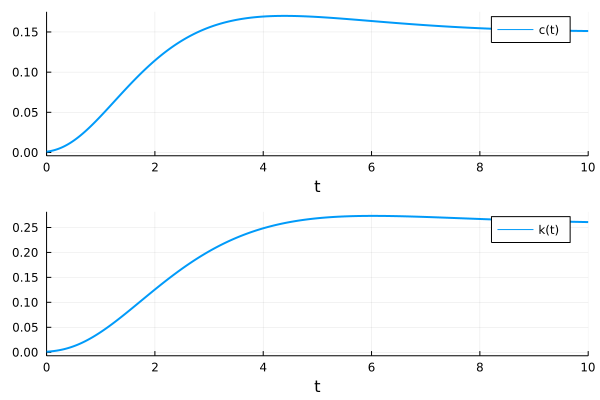

In [43]:
# Example 5: Ramsey Model
# c'(t) = 1/sigma * (f'(k(t)) - (n+d+g+rho))c(t)
# k'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)

using OrdinaryDiffEq
using Plots

a = 0.7                            
d = 0.01                            
g = 0.02   
n = 0.02
sigma = 0.5
rho = 1
k0 = 0.001
c0 = 0.001

function ramsey!(du,u,p,t)
    du[1] = u[1]/sigma*(a*u[2]^(a-1)-(n+g+d+rho))              
    du[2] = u[1]^a - u[2] - (n+g+d)u[1]
end

tspan = (0.0,10.0);
prob = ODEProblem(ramsey!,[c0,k0],tspan)
sol = solve(prob,  Tsit5())

plot(sol,linewidth=2,xaxis="t",label=["c(t)" "k(t)"],layout=(2,1))

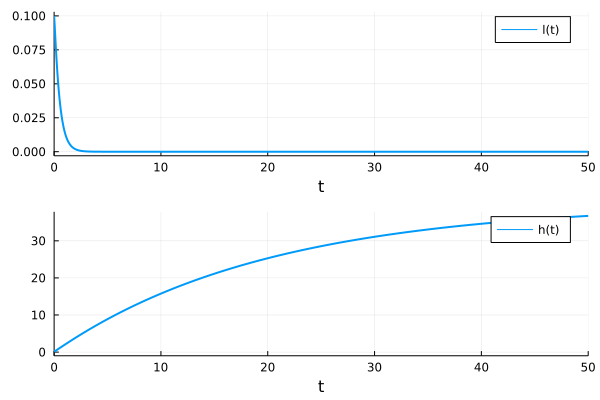

In [37]:
# Example 6: Human Capital Accumulation
# h'(t) = n - l(t) - δh(t)
# l'(t) = l(t)^2/h(t) + l(t) (δ+ρ)

using OrdinaryDiffEq
using Plots

n = 2
δ = 0.05                         
ρ = 2
l0 = 0.1
h0 = 0.1

function ramsey!(du,u,p,t)
    du[1] = u[1]^2/u[2] - (δ+ρ)*u[1]             
    du[2] = n - u[1] - δ*u[2]
end

tspan = (0.0,50.0);
prob = ODEProblem(ramsey!,[l0,h0],tspan)
sol = solve(prob, Tsit5())

plot(sol,linewidth=2,xaxis="t",label=["l(t)" "h(t)"],layout=(2,1))

In [ ]:
# Example 6: Investment with Adjustment Costs
# h'(t) = n - l(t) - δh(t)
# l'(t) = l(t)^2/h(t) + l(t) (δ+ρ)

using OrdinaryDiffEq
using Plots

n = 2
δ = 0.05                         
ρ = 2
l0 = 0.1
h0 = 0.1

function ramsey!(du,u,p,t)
    du[1] = u[1]^2/u[2] - (δ+ρ)*u[1]             
    du[2] = n - u[1] - δ*u[2]
end

tspan = (0.0,50.0);
prob = ODEProblem(ramsey!,[l0,h0],tspan)
sol = solve(prob, Tsit5())

plot(sol,linewidth=2,xaxis="t",label=["l(t)" "h(t)"],layout=(2,1))